In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [3]:
df = pd.read_csv("prices-split-adjusted.csv", index_col = 0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
#Chose one stock
df_stock = df[df.symbol == 'EQIX'].copy()

In [11]:
df_stock.drop(['symbol'],1,inplace=True)

In [13]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df_stock_scaled = sc.fit_transform(df_stock)

In [16]:
# Seperate data into 70% training set, 20% validation set and 10% test set
valid_set_size = int(np.round(20/100*df_stock_scaled.shape[0]));  
test_set_size = int(np.round(10/100*df_stock_scaled.shape[0]));
train_set_size = df_stock_scaled.shape[0] - (valid_set_size + test_set_size);

training_set = df_stock_scaled[:train_set_size,:]

valid_set = df_stock_scaled[train_set_size:train_set_size+valid_set_size,:]

test_set = df_stock_scaled[train_set_size+valid_set_size:,:]

In [18]:
#training_set = df_stock.iloc[:, 1:2].values #Sort out opening
training_set

array([[0.10925029, 0.12290433, 0.11744033, 0.11091105, 0.01393409],
       [0.11889648, 0.11970795, 0.12336141, 0.11081625, 0.01740528],
       [0.11688555, 0.12281032, 0.1228548 , 0.11391205, 0.04092789],
       ...,
       [0.48262427, 0.48052392, 0.48144515, 0.47826636, 0.01043002],
       [0.47756551, 0.48309359, 0.48055857, 0.47403337, 0.01267841],
       [0.48136741, 0.48945503, 0.48945604, 0.48050919, 0.01234312]])

In [43]:
# Creating a data structure with 60 timesteps. Our target is opening price.
time_step = 60
X_train = []
y_train = []
for i in range(time_step, training_set.shape[0]):
    X_train.append(training_set[i-time_step:i, :])
    y_train.append(training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [44]:
X_train.shape

(1174, 60, 5)

In [45]:
y_train.shape

(1174,)

In [46]:
# Part 2 - Building the RNN
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation; input_shape = (timestep, input_dim)
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

In [47]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [48]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [49]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [50]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
37/37 [==============================] - 2s 45ms/step - loss: 0.0090
Epoch 2/100
37/37 [==============================] - 2s 44ms/step - loss: 0.0020
Epoch 3/100
37/37 [==============================] - 2s 43ms/step - loss: 0.0017
Epoch 4/100
37/37 [==============================] - 2s 44ms/step - loss: 0.0015
Epoch 5/100
37/37 [==============================] - 2s 44ms/step - loss: 0.0014
Epoch 6/100
37/37 [==============================] - 2s 43ms/step - loss: 0.0012
Epoch 7/100
37/37 [==============================] - 2s 43ms/step - loss: 0.0014
Epoch 8/100
37/37 [==============================] - 2s 43ms/step - loss: 0.0011
Epoch 9/100
37/37 [==============================] - 2s 43ms/step - loss: 0.0011
Epoch 10/100
37/37 [==============================] - 2s 43ms/step - loss: 0.0011
Epoch 11/100
37/37 [==============================] - 2s 43ms/step - loss: 0.0011
Epoch 12/100
37/37 [==============================] - 2s 43ms/step - loss: 0.0012
Epoch 13/100
37/37 [=====

Epoch 97/100
37/37 [==============================] - 2s 47ms/step - loss: 4.3426e-04
Epoch 98/100
37/37 [==============================] - 2s 47ms/step - loss: 3.7972e-04
Epoch 99/100
37/37 [==============================] - 2s 47ms/step - loss: 3.7017e-04
Epoch 100/100
37/37 [==============================] - 2s 47ms/step - loss: 3.8804e-04


In [51]:
# Part 3 - Evaluating model performance thought validation set and visualising the results
time_step = 60
X_valid = []
y_valid = []
for i in range(time_step, valid_set.shape[0]):
    X_valid.append(valid_set[i-time_step:i, :])
    y_valid.append(valid_set[i, 0])
X_valid, y_valid = np.array(X_valid), np.array(y_valid)

In [52]:
# Getting the predicted stock price of 2017
predicted_stock_price = regressor.predict(X_valid)
#Epredicted_stock_price = sc.inverse_transform(predicted_stock_price)


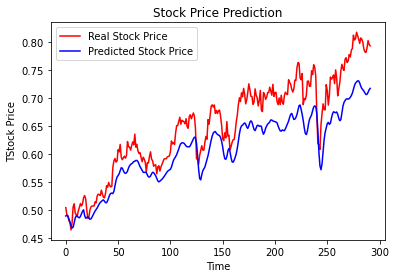

In [54]:
# Visualising the results
plt.plot(y_valid, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TStock Price')
plt.legend()
plt.show()